In [1]:
import pandas as pd 
import numpy as np

In [6]:
df=pd.read_csv(r'C:\Users\asuss\Desktop\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
df.shape
print("number of rows = ",df.shape[0])
print("number of column  = ",df.shape[1])

number of rows =  1338
number of column  =  7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## ckeck the null value 

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.sex.unique()

array(['female', 'male'], dtype=object)

## convert categorical values 

In [13]:
df['sex']=df['sex'].map({'female':0,'male':1}) # convert male & femal int 0,1

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [15]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [16]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [17]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
df['region']=df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


## split our data to feature matrix and target vector

In [19]:
X=df.drop(columns='charges')
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [20]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [21]:

from sklearn.model_selection import train_test_split


## split our data 

In [22]:
x_train ,x_test ,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
x_train.isnull().sum()  # check the null again 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score


## train model with deferent algorithms

In [25]:
ir=LinearRegression()
ir.fit(x_train,y_train)
svm= SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

## use model to predict 

In [26]:
y_pred1=ir.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

In [27]:
df1=pd.DataFrame({'actual':y_test,'ir':y_pred1,'svm':y_pred2,'rf':y_pred3,"gr":y_pred4}) # list our prediction in data frame
df1 

,actual,ir,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10844.973342,11001.128629
887,5272.17580,7116.295018,9492.515425,4945.031468,5840.174656
890,29330.98315,36909.013521,9648.758701,28216.344152,28001.980112
1293,9301.89355,9507.874691,9555.044136,9669.910492,9745.291602
259,33750.29180,27013.350008,9420.421978,34541.663534,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46884.308925,45431.423211
575,12222.89830,11814.555568,9625.431547,12410.882128,12465.025294
535,6067.12675,7638.107736,9504.168517,6342.722540,6974.336525
543,63770.42801,40959.081722,9605.004594,46963.271463,47862.047791


 ## plot every model prediction with actual data

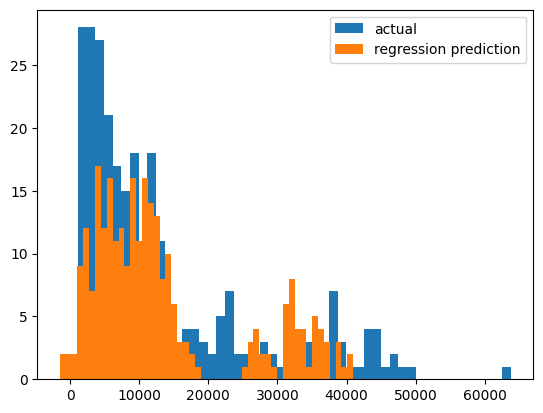

In [28]:
plt.hist(df1['actual'],label="actual",bins=50)
plt.hist(df1['ir'] ,label="regression prediction",bins=50)
plt.legend()

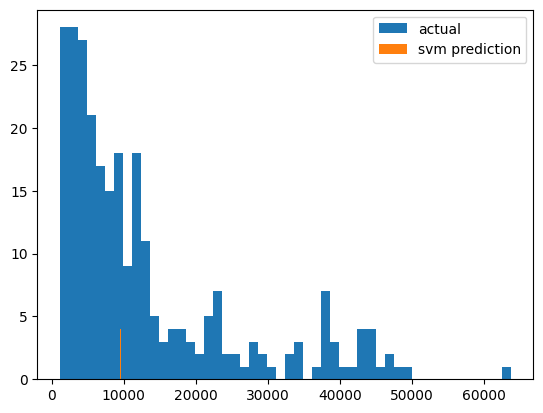

In [29]:
plt.hist(df1['actual'],label="actual",bins=50)
plt.hist(df1['svm'] ,label="svm prediction",bins=50)
plt.legend()

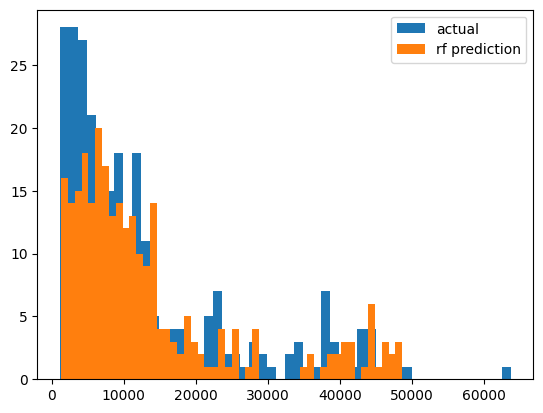

In [30]:
plt.hist(df1['actual'],label="actual",bins=50)
plt.hist(df1['rf'] ,label="rf prediction",bins=50)
plt.legend()

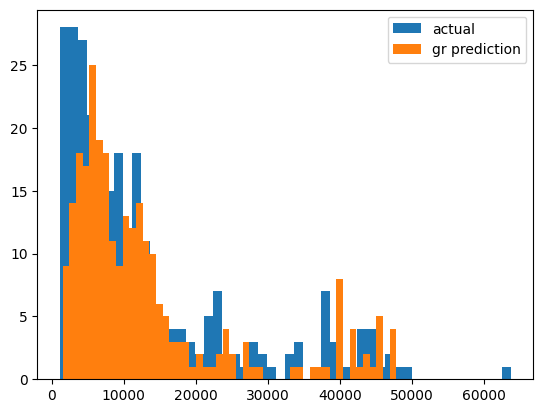

In [31]:
plt.hist(df1['actual'],label="actual",bins=50)
plt.hist(df1['gr'] ,label="gr prediction",bins=50)
plt.legend()

## plot all 4 models prediction with actual data 

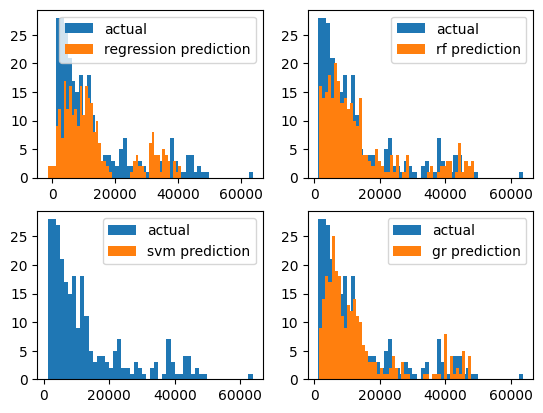

In [32]:
plt.subplot(2,2,1) # (2,2,1) this mean 2 row 2 column  and 1 mean first subplot
plt.hist(df1['actual'],label="actual",bins=50)
plt.hist(df1['ir'] ,label="regression prediction",bins=50)
plt.legend()

plt.subplot(2,2,2)
plt.hist(df1['actual'],label="actual",bins=50)
plt.hist(df1['rf'] ,label="rf prediction",bins=50)
plt.legend()

plt.subplot(2,2,3)
plt.hist(df1['actual'],label="actual",bins=50)
plt.hist(df1['svm'] ,label="svm prediction",bins=50)
plt.legend()

plt.subplot(2,2,4)
plt.hist(df1['actual'],label="actual",bins=50)
plt.hist(df1['gr'] ,label="gr prediction",bins=50)
plt.legend()

## evaluate  the model 

In [33]:
y_pre_all=[y_pred1,y_pred2,y_pred3,y_pred4]

for value_ in y_pre_all:
    score=r2_score(value_,y_test)
    print(score)

0.7086166433516324
-28837.59995288833
0.8526383693806648
0.8613428606358946


## predict charges for new customer

In [34]:
data={'age':40,
     'sex':1,
      'bmi':40.03,
      "children":3,
      'smoker':1,
      'region':3
   
     }

In [35]:
nwe_data=pd.DataFrame(data, index=[0])

In [36]:
nwe_data

,age,sex,bmi,children,smoker,region
0,40,1,40.03,3,1,3


In [37]:
 print("the predicted charge is " ,gr.predict(nwe_data))

the predicted charge is  [43395.97774727]


## save the model

In [38]:
gr=GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [39]:
import joblib

In [40]:
joblib.dump(gr,'model_joblib_gr') # save the model 

['model_joblib_gr']

In [41]:
model=joblib.load('model_joblib_gr') # load the model to predict 

In [42]:
model.predict(nwe_data)  #the predict here is different because this model trained with all  data frame X,y not x_train and y_train 

array([43183.77504294])

## GUI for the model

In [72]:
from tkinter import Tk, Label, Entry, Button, mainloop
from PIL import Image, ImageTk
import joblib

def show_entry():
    age = float(e1.get())
    bmi = float(e2.get())
    gender = float(e3.get())
    children = float(e4.get())
    smoker = float(e5.get())
    region = float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    result = model.predict([[age, bmi, gender, children, smoker, region]])
    
    result_label.config(text=result[0])

def clear_entry():
    e1.delete(0, 'end')
    e2.delete(0, 'end')
    e3.delete(0, 'end')
    e4.delete(0, 'end')
    e5.delete(0, 'end')
    e6.delete(0, 'end')
    result_label.config(text="")

master = Tk()
master.title("Health Insurance Prediction")

Label(master, text="Insurance Cost Prediction", bg="black", fg="white").grid(row=0, columnspan=2)
Label(master, text="Enter your age").grid(row=1, column=1)
Label(master, text="Enter your BMI").grid(row=2, column=1)
Label(master, text="Male or Female [0/1]").grid(row=3, column=1)
Label(master, text="Enter number of children").grid(row=4, column=1)
Label(master, text="Smoke yes or no [0/1]").grid(row=5, column=1)
Label(master, text="Enter your region [1-4]").grid(row=6, column=1)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e1.grid(row=1, column=2)
e2.grid(row=2, column=2)
e3.grid(row=3, column=2)
e4.grid(row=4, column=2)
e5.grid(row=5, column=2)
e6.grid(row=6, column=2)

Button(master, text="Predict", command=show_entry).grid(row=7, column=1, pady=10)
Button(master, text="Clear", command=clear_entry).grid(row=7, column=2, pady=10)

# Load the static image
image_path = r"C:\Users\asuss\Desktop\insurance.jpg"
image = Image.open(image_path)
image = image.resize((300, 300))  # Resize the image as desired
static_image = ImageTk.PhotoImage(image)

# Create a label with the static image
static_label = Label(master, image=static_image)
static_label.image = static_image  # Attach the image to the label
static_label.grid(row=8, columnspan=2)

# Create a label for displaying the result
result_label = Label(master, text="")
result_label.grid(row=7, column=3, padx=10)

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\asuss\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\asuss\AppData\Local\Temp\ipykernel_19044\663789386.py", line 6, in show_entry
    age = float(e1.get())
ValueError: could not convert string to float: 'uo8o'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\asuss\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\asuss\AppData\Local\Temp\ipykernel_19044\663789386.py", line 6, in show_entry
    age = float(e1.get())
ValueError: could not convert string to float: 'uo8o'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\asuss\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\asuss\AppData\Loca